In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv("./data/real_estate.csv")

In [3]:
df.shape

(414, 7)

In [4]:
df.head()

,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   transaction_date          414 non-null    float64
 1   house_age                 414 non-null    float64
 2   transit_distance          414 non-null    float64
 3   local_convenience_stores  414 non-null    int64  
 4   latitude                  414 non-null    float64
 5   longitude                 414 non-null    float64
 6   price_per_unit            414 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 22.8 KB


In [6]:
def plot_distribution(dataset):
    try:
        print("Field name :",dataset.name)
    except Exception as e:
        pass
    min_value = dataset.min()
    max_value = dataset.max()
    mean_value = dataset.mean()
    median_value = dataset.median()
    mode_value = dataset.mode()[0]
    
    print(f"""
    Minimum Value : {min_value} 
    Maximum Value : {max_value}
    Median        : {median_value}
    Mode Value    : {mode_value}
    Mean Value    : {mean_value}
    """)
    
    fig, ax = plt.subplots(3,1,figsize=(12,12))
    
    ax[0].hist(dataset.values)
    ax[0].set_ylabel('Frequency')

    ax[0].axvline(x=min_value, color = 'gray', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mean_value, color = 'cyan', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=median_value, color = 'red', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mode_value, color = 'yellow', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=max_value, color = 'gray', linestyle='dashed', linewidth = 2)


    ax[1].boxplot(dataset,vert=False)
    ax[1].set_xlabel('Value')
    
    sns.distplot(dataset,kde=True,hist=True)
    ax[2].axvline(x=min_value, color = 'gray', linestyle='dashed', linewidth = 2)
    ax[2].axvline(x=mean_value, color = 'cyan', linestyle='dashed', linewidth = 2)
    ax[2].axvline(x=median_value, color = 'red', linestyle='dashed', linewidth = 2)
    ax[2].axvline(x=mode_value, color = 'yellow', linestyle='dashed', linewidth = 2)
    ax[2].axvline(x=max_value, color = 'gray', linestyle='dashed', linewidth = 2)
    
    fig.suptitle(dataset.name)

    plt.show()

Field name : price_per_unit

    Minimum Value : 7.6 
    Maximum Value : 117.5
    Median        : 38.45
    Mode Value    : 24.7
    Mean Value    : 37.980193236714975
    


c:\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


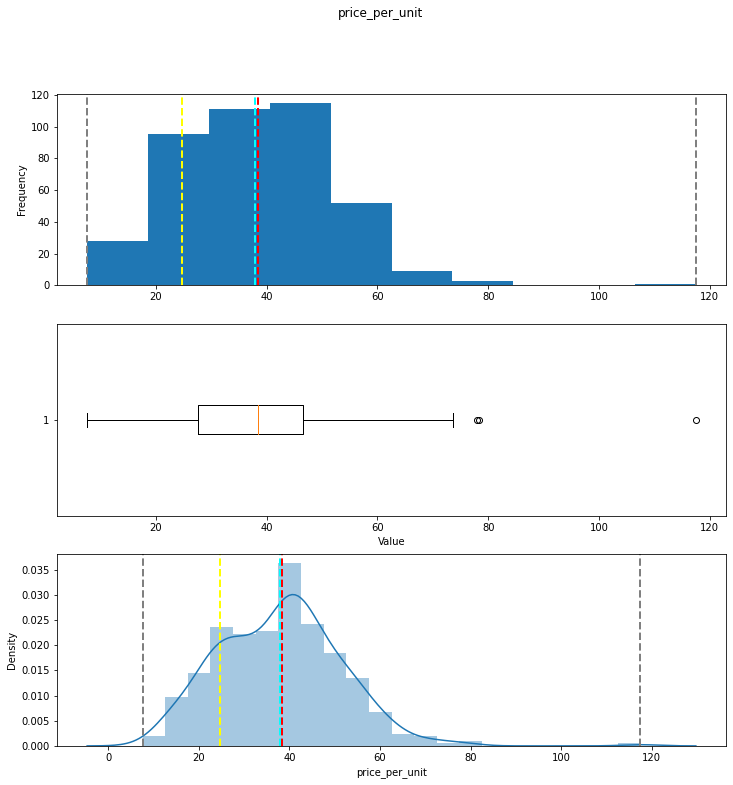

In [7]:
plot_distribution(df['price_per_unit'])

## Removing outliers 

Field name : price_per_unit

    Minimum Value : 7.6 
    Maximum Value : 69.7
    Median        : 38.25
    Mode Value    : 24.7
    Mean Value    : 37.34142156862745
    


c:\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


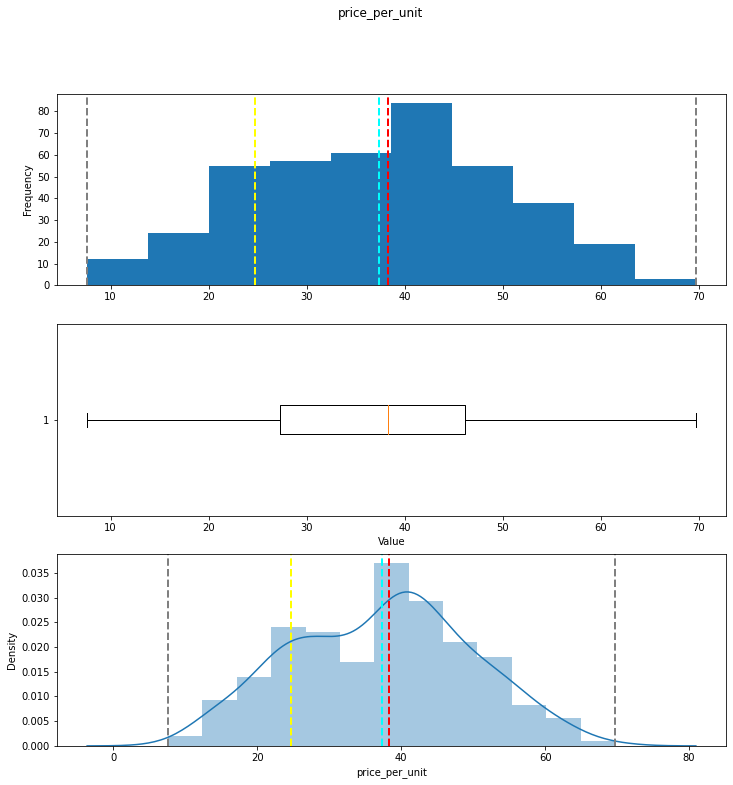

In [8]:
plot_distribution(df['price_per_unit'][df["price_per_unit"] < 70])

In [9]:
df = df[df["price_per_unit"] < 70]

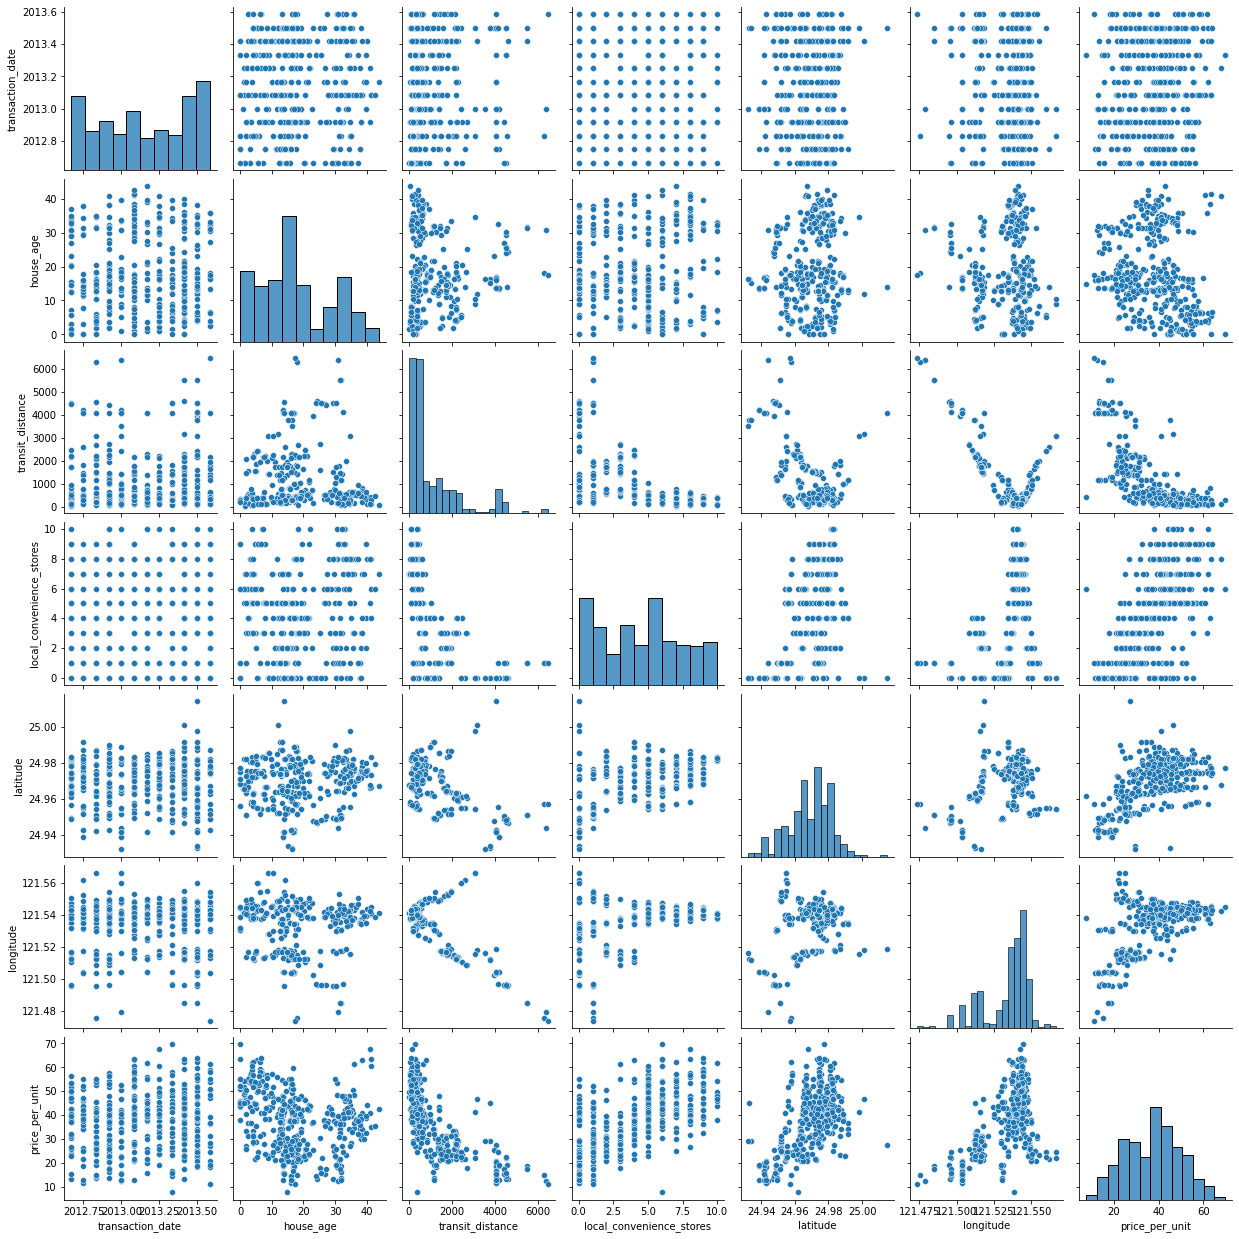

In [10]:
sns.pairplot(df)

- looks like `transaction_Date` and `local_convenience_stores` are categorical/ discrete 


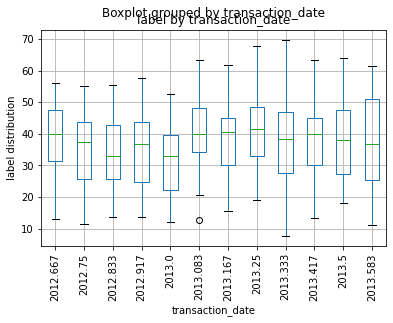

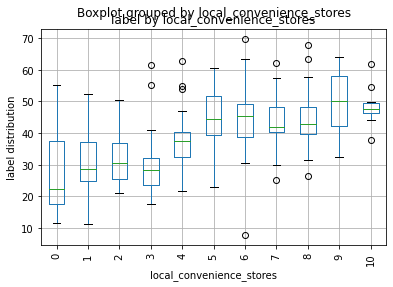

In [11]:
for col in df[['transaction_date','local_convenience_stores']]:
    fig = plt.figure()

    ax = fig.gca()
    df.boxplot(column="price_per_unit",by=col,ax=ax)
    plt.xticks(rotation='vertical')
    ax.set_title("label by "+col)
    ax.set_ylabel("label distribution")
plt.show()


In [12]:
from sklearn.model_selection import train_test_split

X, y = df[df.columns[:-1]].values, df[df.columns[-1]].values

In [13]:
X.shape

(408, 6)

In [14]:
y.shape

(408,)

In [15]:
xtrain, xtest, ytrain, ytest = train_test_split(X,y,random_state=0,test_size=0.30)

In [16]:
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((285, 6), (123, 6), (285,), (123,))

In [17]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.ensemble import RandomForestRegressor
import numpy as np 


In [18]:
numeric_features_indeces = [0,1,3,4]
numeric_transformer = Pipeline(steps=[
    ('scale',StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num',numeric_transformer,numeric_features_indeces)
    ]
)

pipeline = Pipeline(
    steps=[
        ('preprocessor',preprocessor),
        ('regressor',RandomForestRegressor(1000))
    ]
)

model = pipeline.fit(xtrain,ytrain)

print(model)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scale',
                                                                   StandardScaler())]),
                                                  [0, 1, 3, 4])])),
                ('regressor', RandomForestRegressor(n_estimators=1000))])


In [19]:
from sklearn.metrics import r2_score,mean_squared_error

predictions = model.predict(xtest)

mse = mean_squared_error(ytest,predictions)
r2score = r2_score(ytest,predictions)
print(f"""

MEAN SQUARED ERROR      : {mse}
ROOT MEAN SQUARED ERROR : {np.sqrt(mse)}
R2 SCORE                : {r2score}

""")



MEAN SQUARED ERROR      : 36.02194717095401
ROOT MEAN SQUARED ERROR : 6.001828652248746
R2 SCORE                : 0.692623097707714




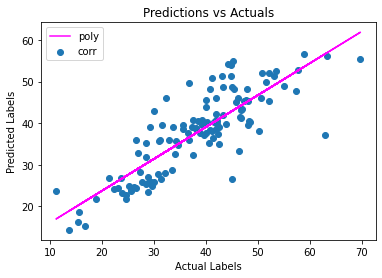

In [20]:
plt.scatter(ytest, predictions,label="corr")
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Predictions vs Actuals')
z = np.polyfit(ytest, predictions, 1)
p = np.poly1d(z)
plt.plot(ytest,p(ytest), color='magenta',label="poly")
plt.legend(loc="best")

plt.show()

In [22]:
import joblib 

joblib.dump(model,"./models/realestate_regression_model.pkl")

['./models/realestate_regression_model.pkl']